In [2]:
import fasttext
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import random
import matplotlib.pylab as plt

In [3]:
ft = fasttext.load_model('../../ft_data/MX.bin')

In [4]:
len(ft.get_words())

571689

In [5]:
type(ft.get_words())

list

In [6]:
#words = ft.get_words() 
words = random.sample(ft.get_words(), 1500)

In [21]:
#ft.get_word_vector('casa')
ft.get_dimension()

300

In [22]:
%time ft.get_nearest_neighbors('casa')

Wall time: 223 ms


[(0.7055066823959351, 'casita'),
 (0.6605292558670044, 'depa'),
 (0.6359991431236267, 'casaa'),
 (0.5902785062789917, 'recamara'),
 (0.5883163809776306, '🏠'),
 (0.5849549770355225, '🏡'),
 (0.5732880234718323, 'ksa'),
 (0.5494673252105713, 'habitacion'),
 (0.5479555130004883, 'casaabue'),
 (0.5374772548675537, 'casitaa')]

In [10]:
# ft.get_word_vector() Returns the vector representation of provided words (unsupervised training) or provided labels (supervised training).
# get_word_vector         # Get the vector representation of word.


%time x = [ft.get_word_vector(w) for w in words]
# normalize y antes del k-means
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

Wall time: 51.9 ms


In [39]:
x[0].min()

-0.63324857

In [40]:
def minmax_norm(vec):
    return (vec - vec.min()) / ( vec.max() - vec.min())

In [41]:
print(minmax_norm(x[0]))

[0.84586513 0.31417632 0.5984581  0.42619354 0.76713634 0.51155704
 0.8850016  0.65301585 0.51066166 0.30273917 0.63430643 0.60402524
 0.4928989  0.5273192  0.1807953  0.38023162 0.46271688 0.6826473
 0.8903582  0.54661226 0.3026656  0.38935408 0.6757414  0.66978925
 0.49548057 0.8055834  0.45076555 0.5108597  0.6228913  0.6485459
 0.6944412  0.5374327  0.6846236  0.6769854  0.8432292  0.7410759
 0.97785276 0.6888116  0.37697792 0.54762554 0.09668767 0.34417954
 0.5683084  0.593832   0.64092636 0.5341621  0.769556   0.66224277
 0.48293105 0.6722726  0.45306537 0.19342804 0.31252572 0.53421265
 0.5604397  0.41976652 0.47069448 0.91744477 0.4113048  0.66035503
 0.4992332  0.5042063  0.54119927 0.4328057  0.66401696 0.35670444
 0.03199094 0.4223679  0.63853496 0.3013278  0.         0.697036
 0.79518336 0.33489063 0.59327626 0.4264311  0.8387486  0.34760723
 0.67404675 0.90087444 0.852947   0.65509367 0.29208142 0.42702997
 0.75528413 0.27140594 0.35160193 0.7731177  0.589695   0.15783077


In [28]:
import numpy as np
def normalize(vector):
    return vector/np.linalg.norm(vector)

In [33]:
print(x[0])
print(minmax_norm(x[0]))

[ 3.70227158e-01 -2.60531604e-01  7.67205805e-02 -1.27642170e-01
  2.76828706e-01 -2.63728555e-02  4.16655928e-01  1.41444087e-01
 -2.74350643e-02 -2.74099827e-01  1.19248532e-01  8.33250508e-02
 -4.85075228e-02 -7.67366262e-03 -4.18765575e-01 -1.82168186e-01
 -8.43134150e-02  1.76596791e-01  4.23010588e-01  1.52142672e-02
 -2.74187118e-01 -1.71345919e-01  1.68404043e-01  1.61342904e-01
 -4.54448238e-02  3.22439641e-01 -9.84916314e-02 -2.72000339e-02
  1.05706431e-01  1.36141330e-01  1.90588251e-01  4.32426017e-03
  1.78941324e-01  1.69879869e-01  3.67100060e-01  2.45912373e-01
  5.26808023e-01  1.83909684e-01 -1.86028153e-01  1.64163169e-02
 -5.18545032e-01 -2.24937871e-01  4.09531109e-02  7.12324977e-02
  1.27101958e-01  4.44224017e-04  2.79699177e-01  1.52390227e-01
 -6.03327081e-02  1.64288998e-01 -9.57632586e-02 -4.03778970e-01
 -2.62489766e-01  5.04239637e-04  3.16181816e-02 -1.35266736e-01
 -7.48492926e-02  4.55144227e-01 -1.45305127e-01  1.50150806e-01
 -4.09929901e-02 -3.50932

In [16]:
%time df = pd.DataFrame(x)

Wall time: 186 ms


In [17]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.370227,-0.260532,0.076721,-0.127642,0.276829,-0.026373,0.416656,0.141444,-0.027435,-0.274100,...,0.151409,0.200997,-0.142259,-0.023790,-0.051931,0.033370,0.012542,-0.440476,-0.303120,-0.319268
1,-0.031187,-0.237397,0.640692,-0.330927,-0.245121,0.225713,-0.040756,0.381048,0.208103,-0.359284,...,0.094687,0.043244,-0.532962,-0.341243,0.492221,0.125288,-0.157447,0.000160,0.104482,0.444454
2,-0.132654,0.153364,-0.029752,-0.173606,0.116617,-0.233582,-0.350140,0.187894,-0.062353,0.100764,...,-0.390635,-0.025805,0.263029,-0.188268,0.345636,-0.257362,0.058501,-0.141719,-0.640513,0.108488
3,0.212704,0.235095,-0.003270,-0.114562,-0.186768,0.074094,0.166523,0.139549,0.015472,0.146120,...,0.149855,0.116746,-0.508227,-0.016231,0.190483,-0.408162,0.068054,-0.235450,-0.026594,0.228113
4,0.572648,0.275532,0.474797,-0.006524,0.259776,0.107363,0.082367,0.142820,0.077856,-0.100832,...,0.035890,-0.189449,0.004254,0.263692,0.192788,-0.139187,0.121481,-0.050573,-0.149837,0.161444
5,0.205488,0.154174,0.316297,-0.271066,0.050546,0.164856,-0.141569,-0.113010,0.281455,0.172615,...,-0.057822,0.078045,0.117229,0.468893,-0.180680,-0.129451,-0.144541,0.348528,-0.313425,0.157084
6,0.190043,0.207640,0.270056,0.338428,0.185279,-0.103946,0.097137,-0.200865,-0.236198,-0.177547,...,0.102268,0.050477,-0.078167,0.194873,0.109999,-0.230755,0.079948,0.118371,-0.211481,0.191175
7,0.023406,-0.278548,0.504135,-0.607705,0.141489,0.084872,0.651705,0.294973,0.104955,0.450403,...,0.494287,-0.037676,0.163197,0.152537,-0.048849,-0.191099,-0.087453,-0.249292,0.139947,0.128453
8,0.156355,0.113024,0.100798,-0.148409,-0.178317,0.248269,0.023986,0.136285,0.274918,0.137683,...,-0.033547,-0.096731,0.164480,-0.110540,0.005443,-0.211024,0.045013,0.329003,-0.260450,0.004560
9,-0.145064,0.021103,0.163676,-0.073551,-0.057318,-0.130833,0.053248,-0.025255,-0.115388,-0.112378,...,0.216377,-0.257671,0.170837,-0.056352,0.380867,0.023326,0.092128,-0.013441,-0.516526,-0.080539


In [18]:
%time df.describe()

Wall time: 698 ms


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.142098,0.019570,0.196867,-0.163969,0.000305,0.074291,0.088234,0.060133,-0.010320,-0.049652,...,0.112716,0.027183,-0.061846,0.098661,0.101979,-0.070967,0.086162,-0.034825,-0.103279,0.093640
std,0.221041,0.223467,0.207560,0.224152,0.196723,0.196375,0.226994,0.191614,0.204780,0.190297,...,0.234998,0.200381,0.253143,0.198363,0.184396,0.194572,0.213382,0.207781,0.222207,0.200293
min,-0.715286,-0.837877,-0.612757,-0.910912,-0.739104,-0.550110,-0.609046,-0.548183,-0.881253,-0.704561,...,-0.811262,-0.781700,-1.272071,-0.659802,-0.527432,-0.846088,-0.645952,-0.736231,-0.890394,-0.643609
25%,-0.005445,-0.130326,0.064074,-0.318916,-0.133025,-0.050697,-0.061546,-0.061742,-0.150469,-0.177785,...,-0.036018,-0.101578,-0.219539,-0.030263,-0.023358,-0.193626,-0.054222,-0.168145,-0.252722,-0.036594
50%,0.133390,0.021604,0.199142,-0.157023,-0.002072,0.074202,0.080119,0.058363,-0.000532,-0.049154,...,0.117418,0.026835,-0.054675,0.091824,0.097923,-0.073681,0.086387,-0.035207,-0.103320,0.081860
75%,0.282290,0.159975,0.333515,-0.017391,0.125001,0.198007,0.234932,0.184067,0.129176,0.074672,...,0.277439,0.154002,0.102106,0.221834,0.223709,0.057174,0.224988,0.100984,0.037986,0.220849
max,1.084718,0.806926,0.900986,0.564085,0.796675,0.977318,0.860399,0.703365,0.647071,0.613481,...,0.900514,0.818560,0.697532,0.864814,0.912577,0.648858,0.930109,0.703547,1.149639,0.998100


In [20]:
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(x)

ValueError: n_samples=15 should be >= n_clusters=100.

In [17]:
#fet.get_words
#ft.get_sentence_vector

# sacar los vectores del get_words
# 
#X = random.sample(X, 150000)
#len(X)

In [6]:
# X = pd.DataFrame(ft.get_words())

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
# x csr_matrix - sparse matrix (or dense matrix) matriz de dispersión

In [23]:
X

NameError: name 'X' is not defined

In [9]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(X)

Wall time: 19.9 s


KMeans(max_iter=100, n_clusters=10, random_state=42)

In [8]:
kmeans = KMeans(n_clusters = 600, init = 'k-means++', random_state = 42,  max_iter=100)
# kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

In [9]:
%time kmeans.fit(y)

Wall time: 15.2 s


KMeans(max_iter=100, n_clusters=600, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters = 4000, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(X)

In [ ]:
centroids = kmeans.cluster_centers_

In [13]:
#plt.spy(X, markersize=0.3)
#plt.spy(centroids, precision=0.1, markersize=5)

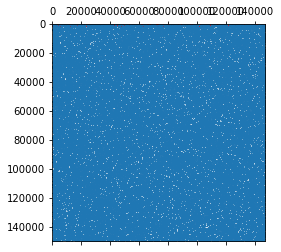

In [17]:
fig, ax = plt.subplots()
p2 = ax.spy(centroids, marker='o', markersize=1.7, c='red')
p1 = ax.spy(X, markersize=0.3)
plt.show()

In [25]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = kmeans.predict(Y)
print(prediction)

[2]


In [23]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 compele
 eith
 ejecucion
 eject
 ejecentral
 ejecayan
 ejec
 ejdeque
 ejar
 ejalee
Cluster 1:
 ontologica
 eizamusica
 ejec
 ejdeque
 ejar
 ejalee
 ejale
 eizita
 eiya
 ejecentral
Cluster 2:
 _usr
 __
 _url
 no
 el
 que
 me
 yo
 hoy
 _numam
Cluster 3:
 preparacion
 힐링타임
 eisten
 ejecayan
 ejec
 ejdeque
 ejar
 ejalee
 ejale
 eizita
